{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Describe how rainfall or precipitation contributes to a flood event.
* Describe how rainfall is measured.

</div>


## What Is Precipitation? 

Precipitation refers to moisture from the condensation of atmospheric water vapor that falls to the ground. The term precipitation can refer to rain, snow and even hail. While rainfall is the most common driver of flood events, ice and snow melt can also cause or exacerbate them.
 
<figure>
 <a href="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/big-thompson-creek-road-destruction-colorado-floods.jpg">
 <img src="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/big-thompson-creek-road-destruction-colorado-floods.jpg" alt = "Big Thompson River during the Colorado floods"></a>
 <figcaption> The Big Thompson River rages in Larimer County, Colorado during the 2013 Colorado floods. Source:<a href="https://www.denverpost.com/2015/09/12/two-years-later-2013-colorado-floods-remain-a-nightmare-for-some/" target="_blank">The Denver Post.</a>
 </figcaption>
</figure>



## How Is Precipitation Measured?

Rainfall is reported as the total amount of rain (millimeters, centimeters, or inches) over a given area per period of time. Various types of gauges can be used to measure precipitation. They are often as simple as a small plastic cylinder with vertical ticks that collects water. These precipitation gauges can be manually checked. In some cases there are automated systems in place that will record precipitation over time. 

<figure>
 <a href="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/standard-rain-gauge-colorado-floods.jpg">
 <img src="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/standard-rain-gauge-colorado-floods.jpg" alt = "Rain gage"></a>
 <figcaption>Image of a standard rain gage. Source:<a href="https://en.wikipedia.org/wiki/File:Rain_gauge_2525388751_4c05081862_b.jpg" target="_blank">Wikipedia.</a>
 </figcaption>
</figure>


## Where Can You Find Precipitation Data?

Several US governmental organizations collect precipitation data. In this lesson, you will use data from the National Weather Service (NWS) Cooperative Observer Platform (COOP). 

This platform, which is operated by thousands of volunteer weather observers, consists of over 11,000 stations, about 5,000 of them measuring climate. These climate stations report 24 hour minimum and maximum temperature, liquid equivalent precipitation, snowfall, snow depth, and other weather metrics.

<figure>
 <a href="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/map-of-coop-sites-colorado-floods.jpg">
 <img src="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/map-of-coop-sites-colorado-floods.jpg" alt = "Map of US COOP sites"></a>
 <figcaption>Map of US COOP sites. Source:<a href="https://www.weather.gov/coop/" target="_blank">National Weather Service.</a>
 </figcaption>
</figure>


Another ‘citizen science’ source of precipitation data is CoCoRaHS. In contrast with COOP, this volunteer network measures only precipitation.

## Precipitation and the Colorado Floods

The average annual precipitation (which includes rain and snow) in Boulder, Colorado is 20 inches. This precipitation comes from winter snow, intense summer thunderstorms, and intermittent storms throughout the year. 

The precipitation that led to the 2013 floods was a late summer storm. Due to the atmospheric conditions, the storm produced significant precipitation in a short period of time. 

### How Much Rain Did Boulder Get During the Floods? 

The figure below shows the total precipitation each month from 1948 to 2013 for a National Weather Service COOP site located in Boulder, CO.

In [1]:
import numpy as np
import pandas as pd
import os
import urllib
from matplotlib import pyplot as plt
import seaborn as sns
import earthpy as et
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(font_scale=1.5, style="white")

# set home directory and download data
data = et.data.get_data("colorado-flood", verbose = False)
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

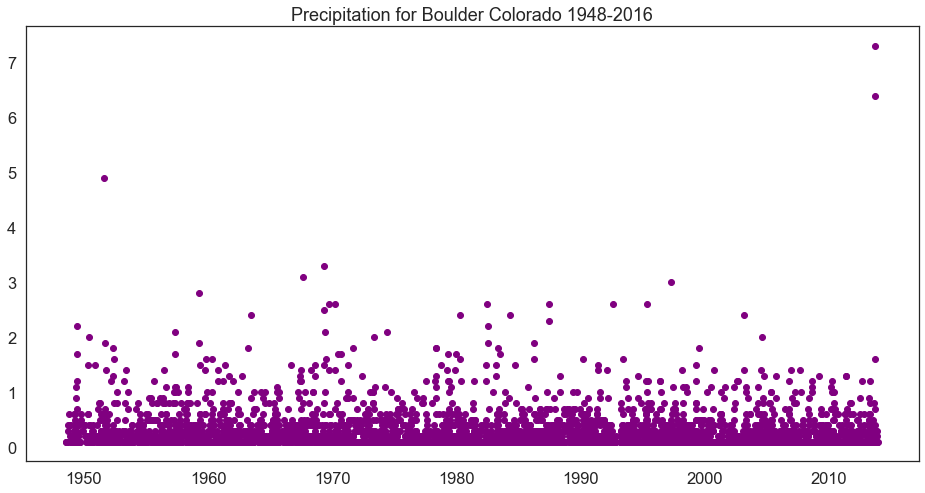

In [2]:
precip = pd.read_csv('data/colorado-flood/precipitation/805333-precip-daily-1948-2013.csv',
                     parse_dates=['DATE'], na_values=['999.99'])
# resample
precip_d = precip.set_index('DATE')

daily_sum_precip = precip_d.resample('D').sum().apply(np.round, decimals=1)
# remove days with no rain
daily_sum_precip = daily_sum_precip[(daily_sum_precip.HPCP != 0.00)]

# note when plottinglots of bars, snap = False will turn off the pixel snapping or set the width to be wider.
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(daily_sum_precip.index,
        daily_sum_precip['HPCP'].values,
        'o',
        color='purple')
ax.set_title("Precipitation for Boulder Colorado 1948-2016")
plt.show()

<i>ABOVE: Graph of total monthly precipitation from 1948 to 2013 for the National Weather Service’s COOP site Boulder 2 (Station ID:050843).</i>

Within this 65 years of data, you can see that there is a jump in the amount of precipitation that was measured in September 2013. If you “zoom in” on the time period of fall 2013 (see the plot below) you will see the precipitation that led to the floods came in the span of just a few days.


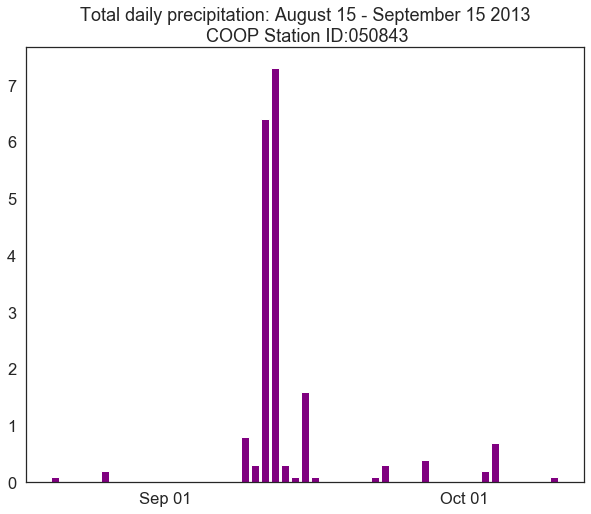

In [3]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
precip_2013 = daily_sum_precip.loc["2013-08-15":"2013-10-15"]

#df.loc[df.index < '2013-10-16 08:00:00']
# note when plottinglots of bars, snap = False will turn off the pixel snapping or set the width to be wider.
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(precip_2013.index,
       precip_2013['HPCP'].values,
       color='purple')
ax.set_title(
    "Total daily precipitation: August 15 - September 15 2013\n COOP Station ID:050843")

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.show()

## Stream Discharge 

### What Is Stream Discharge?

Stream discharge, or flow, is the volume of water that moves through a designated point over a fixed period of time. Measuring stream discharge helps scientists understand the amount and velocity of water that is moving through an area, which is of particular interest during floods. 

### How Is Stream Discharge Measured?

Stream discharge is calculated by multiplying the area of a cross section of the stream by the velocity.

<figure>
 <a href="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/measure-stream-discharge-colorado-floods.png">
 <img src="{{ site.url }}/images/earth-analytics/science/colorado-2013-floods/measure-stream-discharge-colorado-floods.png" alt = "How to measure stream discharge"></a>
 <figcaption>Schematic of how to measure stream discharge. It is measured by multiplying the area of a cross-section of the stream by the velocity. Source:<a href="https://water.usgs.gov/edu/streamflow2.html" target="_blank">USGS.</a>
 </figcaption>
</figure>



### Where Can You Find Stream Discharge Data?

One of the most common sources of stream data is the USGS which maintains a network of sensors in rivers and streams across the country. In addition to stream discharge, these sensors monitor other variables that are important to stream morphology and health such as water level, velocity, and direction of flow. 

### Stream Discharge and the Colorado Floods

During the flooding in Boulder, the combination of atmospheric conditions, precipitation and drought yielded rapid increases in stream flow, which served as a secondary driver of the floods. Stream discharge in Boulder Creek during the 2013 floods was 100 times greater than average, causing the creek to overflow its banks. The velocity of the water in the streams allowed it to pick up and move significant debris
 
The daily average data for the stream gauge along Boulder Creek, five miles downstream of downtown Boulder, is graphed below. This graph, paired with the graph of precipitation in the above section, shows that heavy precipitation led to a stream surge. As a result of this extreme discharge rate, water poured into the flood zone.

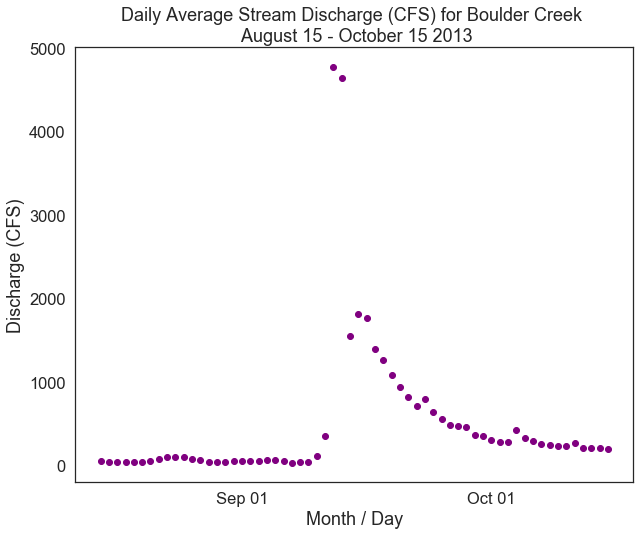

In [4]:
# stream discharge plot to go here.
discharge = pd.read_csv('data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.csv',
                        parse_dates=['datetime'])
# resample
discharge_i = discharge.set_index('datetime')
discharge_2013 = discharge_i.loc["2013-08-15":"2013-10-15"]

# plot the data
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(discharge_2013.index, 'disValue', 'o',
        data=discharge_2013, color='purple')
ax.set(title="Daily Average Stream Discharge (CFS) for Boulder Creek \n August 15 - October 15 2013",
       xlabel="Month / Day", ylabel="Discharge (CFS)")

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.show()